### Convolutional Neural Network Model with Derma Images
#### By Samantha Chan, Belinda Chen, Jessica Ho, Seon Min Kim, Wenli Xie

In [1]:
from medmnist import DermaMNIST
import numpy as np
import pandas as pd
import torchvision.transforms as transforms

data_transform = transforms.Compose([ # create transformation steps
    transforms.ToTensor(), # convert images to tensors
    transforms.Normalize(mean=[.5], std=[.5]) # normalize tensor by rescaling
])

train_dataset = DermaMNIST(split="train", download=True, transform=data_transform) # testing dataset transformed using above transformations
test_dataset = DermaMNIST(split="test", download=True, transform=data_transform) # training dataset transformed using above transformations

c:\Users\wammi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Using downloaded and verified file: C:\Users\wammi\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\wammi\.medmnist\dermamnist.npz


c:\Users\wammi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


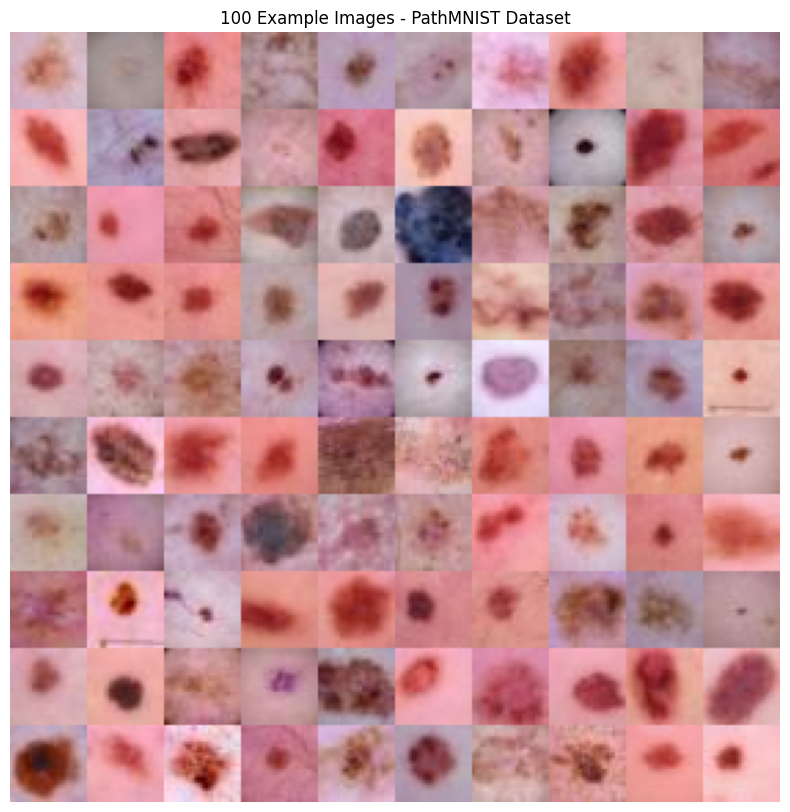

In [2]:
import numpy as np
import matplotlib.pyplot as plt

montage_img = train_dataset.montage(length=10) # create 10x10 grid of 100 images

plt.figure(figsize=(10, 10)) # set figure size to 10 by 10
plt.imshow(montage_img) # show image
plt.axis('off') # no graph axes
plt.title('100 Example Images - PathMNIST Dataset') # title plot
plt.show()# show plot

In [3]:
img, _ = train_dataset[0] # extract image shape from single item in train_dataset
print("Image Shape: " , img.shape) # output shape of image

print("Train dataset size: ", len(train_dataset)) # output how big train dataset is
print("Test dataset size: ", len(test_dataset)) # output how big test dataset is

print(train_dataset) # print summary of train_dataset for label information

Image Shape:  torch.Size([3, 28, 28])
Train dataset size:  7007
Test dataset size:  2005
Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 7007
    Root location: C:\Users\wammi\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.


In [4]:
import pandas as pd

labels = { # initialize dictionary with labels and 0 for count
    0:0, 
    1:0,
    2:0,
    3:0,
    4:0,
    4:0,
    5:0,
    6:0
}

for _, label in train_dataset: # loop through each image in training dataset
    label = int(label) # change label from tensor to int
    if label in labels: # check if label in dictionary
        labels[label] += 1 # if in dictionary, add 1
    else: # if label not in dictionary
        labels[label] = 1 # if not in dictionary, add to dictionary with count 0
        
names = { # dictionary of label number and corresponding label name
    0: 'actinic keratoses and intraepithelial carcinoma',
    1: 'basal cell carcinoma',
    2: 'benign keratosis-like lesions',
    3: 'dermatofibroma',
    4: 'melanoma',
    5: 'melanocytic nevi',
    6: 'vascular lesions'
}

df = pd.DataFrame([ # convert dictionary to pandas dataframe
    {
        "Class Name": names[i], # get label name from number
        "Prevalence (%)": round(100 * labels[i] / sum(labels.values()), 2) # calculate prevalence
    }
    for i in sorted(labels.keys()) # sort in order of labels numbers
])

print(df) # output table


C:\Users\wammi\AppData\Local\Temp\ipykernel_14832\3995716338.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label) # change label from tensor to int


                                        Class Name  Prevalence (%)
0  actinic keratoses and intraepithelial carcinoma            3.25
1                             basal cell carcinoma            5.12
2                    benign keratosis-like lesions           10.97
3                                   dermatofibroma            1.14
4                                         melanoma           11.12
5                                 melanocytic nevi           66.98
6                                 vascular lesions            1.41


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): # create new class
    '''
    Creates a convolutional neural network.
    '''
    def __init__(self, in_channels=3, num_classes=9): # create initialization function
        '''
        intiialize with channels and number of classes
        '''
        super(CNN, self).__init__() # intialize parent class

        # layer 1
        self.layer1 = nn.Sequential( # sequential neural network structure
            nn.Conv2d(in_channels, 16, kernel_size=3), # increase from 3 to 16 channels
            nn.BatchNorm2d(16), # normalization applied in batches
            nn.ReLU() # relu activation function
        )

        # layer 2
        self.layer2 = nn.Sequential( # sequential neural network structure
            nn.Conv2d(16, 16, kernel_size=3), # apply 3x3 convolution with 16 channels still
            nn.BatchNorm2d(16), # normalization applied in batches
            nn.ReLU(), # relu activation function
            nn.MaxPool2d(kernel_size=2, stride=2) # pooling layer with stride window of 2
        )

        # layer 3
        self.layer3 = nn.Sequential( # sequential neural network structure
            nn.Conv2d(16, 64, kernel_size=3), # increase channels from 16 to 64
            nn.BatchNorm2d(64), # normalization applied in batches
            nn.ReLU() # relu activation function
        )

        # layer 4
        self.layer4 = nn.Sequential( # sequential neural network structure
            nn.Conv2d(64, 64, kernel_size=3), # apply 3x3 convolution maintaining 64 channels
            nn.BatchNorm2d(64), # normalization applied in batches
            nn.ReLU(), # relu activation function
            nn.MaxPool2d(kernel_size=2, stride=2) # pooling layer with stride window of 2
        )

        # fully connected layer
        self.fc = nn.Sequential( # sequential neural network structure
            nn.Linear(64 * 4 * 4, 128), # flatten to 64 x 4 x 4
            nn.ReLU(), # relu activation function
            nn.Linear(128, 128), # maintain input/output size 128
            nn.ReLU(), # relu activation function
            nn.Linear(128, num_classes) # final output of number of classes
        )

    def forward(self, x):
        '''
        Defines how model steps through layers of convolutional neural network and returns output data
        '''
        x = self.layer1(x) # apply layer 1
        x = self.layer2(x) # apply layer 2
        x = self.layer3(x) # apply layer 3
        x = self.layer4(x) # apply layer 4
        x = x.view(x.size(0), -1)  # flatten from 4D to 2D
        x = self.fc(x) # apply final layer that outputs correct output dimensions
        return x # return final predicted output

model = CNN(in_channels=3, num_classes=7) # initailize CNN model


In [6]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss() # set loss function as cross entropy loss

In [7]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim

batch_size = 100  # num of samples per mini-batch

train_loader = DataLoader( # load in testing dataset
    train_dataset, # load training dataset
    batch_size=batch_size, # mini-batch size
    shuffle=True # shuffle the data at every epoch
)

test_loader = DataLoader( # load in testing dataset
    test_dataset,  # the testing dataset from PathMNIST
    batch_size=batch_size, # same mini-batch size
    shuffle=False # no need to shuffle during testing
)

learning_rate = 0.01 # set learning rate to 0.01


optimizer = optim.SGD( # stochastic gradient descent optimizer
    model.parameters(), # pass the parameters of the CNN model as done above
    lr=learning_rate # learning rate of 0.01
)


loss: 1.896973  [    0/ 7007]
loss: 1.019275  [    0/ 7007]
loss: 1.088372  [    0/ 7007]
loss: 0.852030  [    0/ 7007]
loss: 1.099501  [    0/ 7007]
loss: 1.001894  [    0/ 7007]
loss: 0.701318  [    0/ 7007]
loss: 0.905251  [    0/ 7007]
loss: 0.907995  [    0/ 7007]
loss: 1.115555  [    0/ 7007]


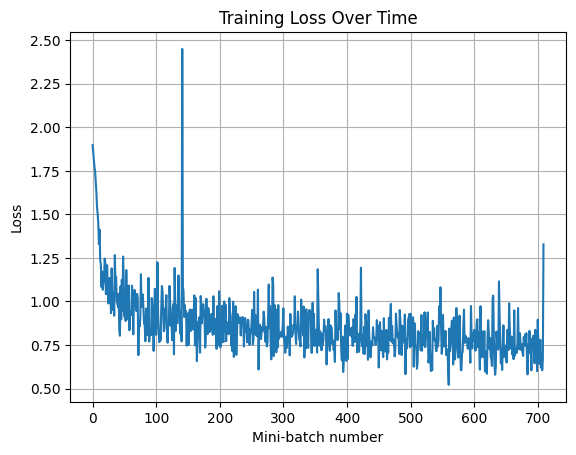

In [8]:
# Define training loop function
def train_loop(dataloader, model, loss_fn, optimizer):
    '''
    Trains the model based on data for 10 epochs. 
    Takes in dataloader, model, a loss function, and an optimizer. 
    '''
    #size = len(dataloader.dataset) # set the size
    model.train() # set the model to training mode
    all_losses = [] # save all losses

    
    for batch, (X,y) in enumerate(dataloader): # for each in dataloader, extract batch and (x,y)

        y = y.squeeze(1).long() # dimension is [100, 1], so convert to just 100 to make 1D

        pred = model(X) # make prediction with model

        loss = loss_fn(pred, y) # calculate loss

        loss.backward() # compute gradients
        optimizer.step() # update weights
        optimizer.zero_grad() # reset gradients

        all_losses.append(loss.item()) # save loss in list

        if batch % 100 == 0:
            current = batch * len(X) # save current batch
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]") # print loss every 100 batches

    return all_losses # return loss list

epochs = 10 # train 10 epochs
all_losses = [] # save losses in list

for t in range(epochs): # for each epoch
    epoch_losses = train_loop(train_loader, model, criterion, optimizer) # train and get loss list
    all_losses += epoch_losses  # collect all mini-batch losses # put current epoch's losses in list

# Plot training loss over all mini-batches
plt.plot(all_losses) # plot giant list of all losses
plt.xlabel("Mini-batch number") # label x axis
plt.ylabel("Loss") # label y axis
plt.title("Training Loss Over Time") # title plot
plt.grid(True) # have grid lines in plot
plt.show() # disply plot


0.8214012888941825


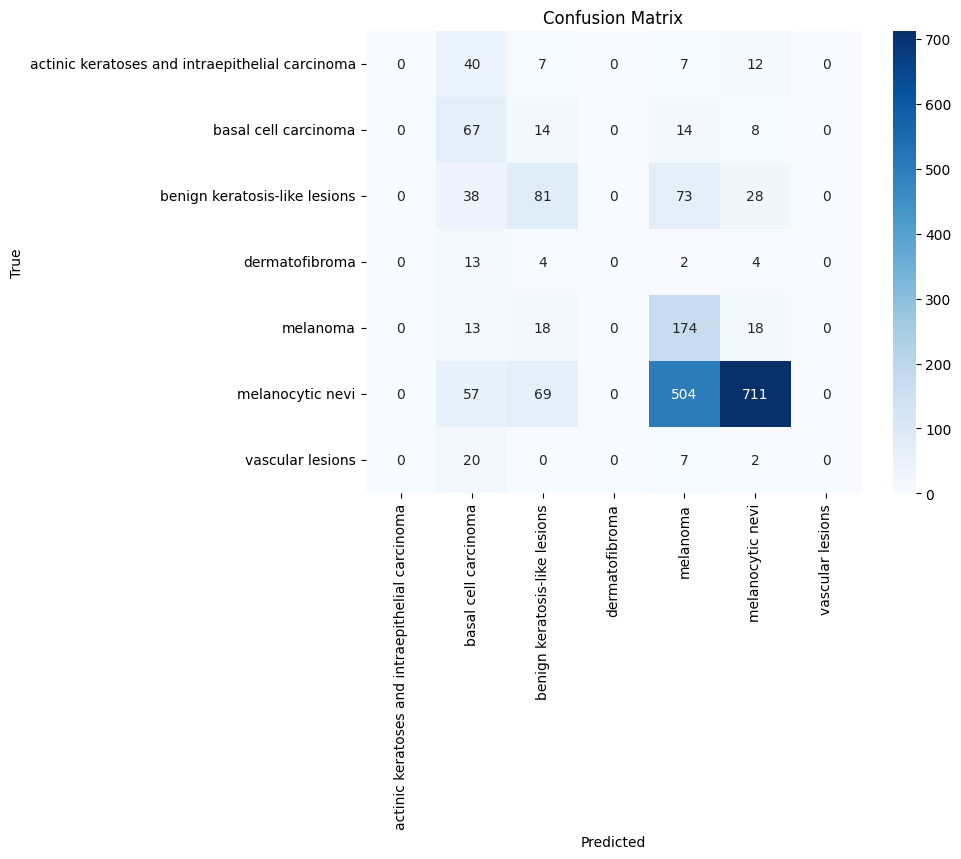

Class 0 AUC: 0.790
Class 1 AUC: 0.884
Class 2 AUC: 0.811
Class 3 AUC: 0.840
Class 4 AUC: 0.784
Class 5 AUC: 0.764
Class 6 AUC: 0.876
Classification Report:
                                                 precision    recall  f1-score   support

actinic keratoses and intraepithelial carcinoma       0.00      0.00      0.00        66
                           basal cell carcinoma       0.27      0.65      0.38       103
                  benign keratosis-like lesions       0.42      0.37      0.39       220
                                 dermatofibroma       0.00      0.00      0.00        23
                                       melanoma       0.22      0.78      0.35       223
                               melanocytic nevi       0.91      0.53      0.67      1341
                               vascular lesions       0.00      0.00      0.00        29

                                       accuracy                           0.52      2005
                                      mac

c:\Users\wammi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wammi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wammi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from medmnist import Evaluator
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
import numpy as np

def getAUC(y_true, y_score, task=None):
    auc = 0.0
    valid_class_count = 0

    for i in range(y_score.shape[1]):
        y_true_binary = (y_true == i).astype(float)
        y_score_binary = y_score[:, i]

        if len(np.unique(y_true_binary)) < 2:
            continue

        auc += roc_auc_score(y_true_binary, y_score_binary)
        valid_class_count += 1

    if valid_class_count == 0:
        return 0.0
    return auc / valid_class_count


def test(data_loader, split): 
    '''
    Evaluates the model on the test data and returns the test accuracy and one-vs-rest AUC.
    Takes in the data_loader and what subset of data evaluating on (split)
    '''
    model.eval() # set in evaluation mode
    y_true = torch.tensor([]) # initialize tensor for true values
    y_score = torch.tensor([]) # initialize tensor for predicted scores
    #data_loader = train_loader_at_eval if split == 'train' else test_loader


    with torch.no_grad(): # with no gradient descent calculations
        for inputs, targets in data_loader: # loop through batches in data_loader
            outputs = model(inputs) # compute predictionary for inputs

            targets = targets.to(torch.float32) # conver to float to calculate metrics
            outputs = outputs.softmax(dim=-1) # convert to class probabilities

            y_true = torch.cat((y_true, targets), 0) # add to accumulated true values
            y_score = torch.cat((y_score, outputs), 0) # add to accumulated predicted score values
            
        
        y_true = y_true.numpy() # convert to numpy arrray
        y_score = y_score.detach().numpy() # detach from graph and convert to numpy
        
        auc = getAUC(y_true, y_score, 'multi-class')
        print(auc)
        
        y_pred = np.argmax(y_score, axis=1)
        y_true_int = y_true.astype(int)
        
        # Confusion matrix
        cm = confusion_matrix(y_true_int, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=names.values(), yticklabels=names.values(), cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.show()

        # Class specific AUC scores
        for i in range(y_score.shape[1]):
            y_true_binary = (y_true == i).astype(float)
            y_score_binary = y_score[:, i]
            if len(np.unique(y_true_binary)) >= 2:
                class_auc = roc_auc_score(y_true_binary, y_score_binary)
                print(f"Class {i} AUC: {class_auc:.3f}")
        
        # Classification metrics across classes

        print("Classification Report:")
        print(classification_report(y_true_int, y_pred, target_names=list(names.values())))

            
data_flag = "dermamnist" # which dataset are we working with

test(test_loader, "test") # run test function


